In [5]:


from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [6]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [8]:
print(os.listdir(TRAIN_DIR))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [9]:
train = pd.DataFrame()
# print(train)
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry

 completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train['image'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 28821 entries, 0 to 28820
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
28821 non-null  object
dtypes: object(1)
memory usage: 225.3+ KB
None


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name: image, Length: 7066, dtype: object


In [13]:
from tqdm.notebook import tqdm

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\Ravi\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

print(train_features)
print(test_features)

[[[[ 72]
   [ 78]
   [ 81]
   ...
   [ 52]
   [ 43]
   [ 40]]

  [[ 65]
   [ 62]
   [ 59]
   ...
   [ 55]
   [ 52]
   [ 45]]

  [[ 47]
   [ 42]
   [ 60]
   ...
   [ 47]
   [ 54]
   [ 49]]

  ...

  [[ 91]
   [ 65]
   [ 46]
   ...
   [ 74]
   [ 54]
   [ 43]]

  [[ 76]
   [ 80]
   [ 76]
   ...
   [108]
   [ 69]
   [ 46]]

  [[ 77]
   [ 74]
   [ 81]
   ...
   [105]
   [108]
   [ 82]]]


 [[[152]
   [149]
   [147]
   ...
   [129]
   [139]
   [121]]

  [[149]
   [152]
   [150]
   ...
   [121]
   [146]
   [135]]

  [[152]
   [152]
   [157]
   ...
   [112]
   [121]
   [145]]

  ...

  [[187]
   [189]
   [120]
   ...
   [184]
   [185]
   [188]]

  [[188]
   [189]
   [193]
   ...
   [185]
   [181]
   [189]]

  [[186]
   [185]
   [183]
   ...
   [193]
   [181]
   [183]]]


 [[[ 29]
   [ 25]
   [ 21]
   ...
   [ 38]
   [ 45]
   [ 37]]

  [[ 31]
   [ 24]
   [ 20]
   ...
   [ 36]
   [ 36]
   [ 40]]

  [[ 28]
   [ 21]
   [ 21]
   ...
   [ 35]
   [ 32]
   [ 40]]

  ...

  [[ 28]
   [ 29]
   [ 26]
   

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\Ravi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [40]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 60, validation_data = (x_test,y_test)) 

Epoch 1/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.2484 - loss: 1.8018 - val_accuracy: 0.2934 - val_loss: 1.7183
Epoch 2/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.2860 - loss: 1.7288 - val_accuracy: 0.3506 - val_loss: 1.6277
Epoch 3/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.3487 - loss: 1.6303 - val_accuracy: 0.4350 - val_loss: 1.4591
Epoch 4/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.4007 - loss: 1.5299 - val_accuracy: 0.4764 - val_loss: 1.3636
Epoch 5/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.4338 - loss: 1.4621 - val_accuracy: 0.4932 - val_loss: 1.3265
Epoch 6/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.4528 - loss: 1.4194 - val_accuracy: 0.4990 - val_loss: 1.3023
Epoch 7/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.4707 - loss: 1.3763 - val_accuracy: 0.5167 - val_loss: 1.2618
Epoch 8/60
226/226 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.4840 - loss: 1.3425 - val_accu

In [41]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [26]:
from keras.models import model_from_json

In [29]:
# json_file = open("facialemotionmodel.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(model_json)
# model.load_weights("facialemotionmodel.h5")

In [42]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [43]:
# function : extract feature for single image 
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [44]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
model prediction is  sad


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  sad


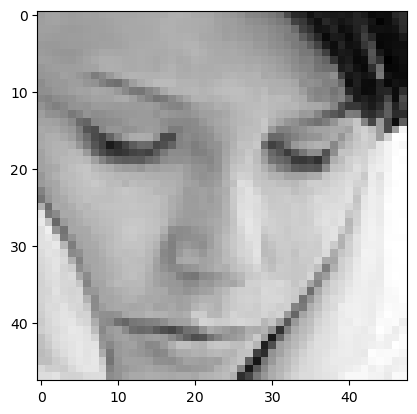

In [46]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\Ravi\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


model prediction is  disgust


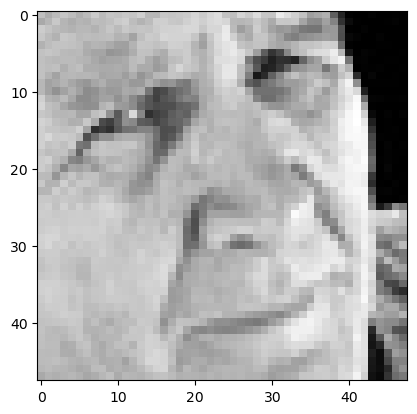

In [56]:
image = 'images/train/fear/158.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  disgust


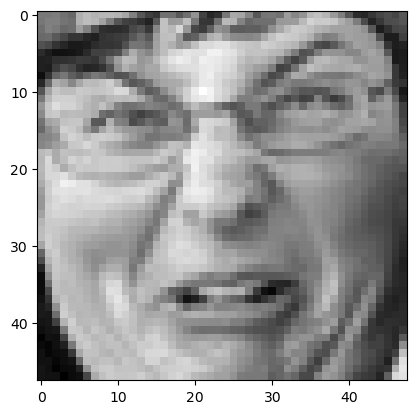

In [51]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
model prediction is  happy


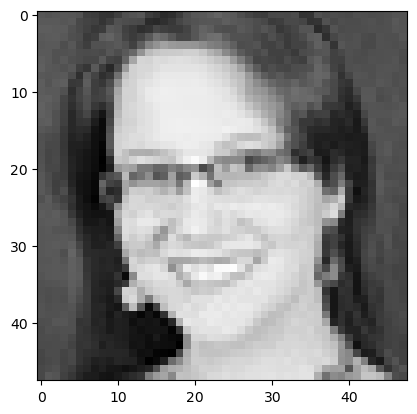

In [52]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  surprise


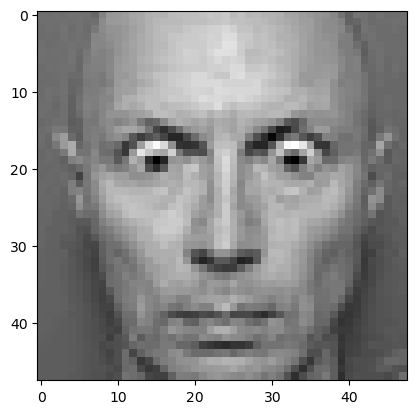

In [53]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')